### Principal Component Analysis
Using the same seattle weather data as last chapter develop a linear regression model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('seattle_weather_1948-2017.csv')

numrows = 25549


dt_df = pd.DataFrame({'today':[0.0]*numrows,
                 'tomorrow':[True]*numrows})

#sort columns for convience
seq = ['today',
       'tomorrow']

dt_df = dt_df.reindex(columns=seq)

for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    dt_df.iat[i,1] = tomorrow
    dt_df.iat[i,0] = today

dt_df = dt_df.dropna() #exclude any rows with missing data


In [3]:
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [2]:
dt_df.head()

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True


In [19]:
from sklearn.decomposition import PCA
x = dt_df.today.values
y = dt_df.tomorrow.values
x = x.reshape(dt_df.shape[0], 1)
#y = y.reshape(dt_df.shape[0], 1)

In [20]:
pca = PCA(n_components=1).fit(x,y)

In [7]:
score = pca.score(x,y)
print(score)

0.012209732825301696


In [32]:
pca = PCA(n_components=1)
pca.fit(x,y)
X_pca = pca.transform(x)
print("original shape:   ", x.shape)
print("transformed shape:", X_pca.shape)

original shape:    (25546, 1)
transformed shape: (25546, 1)


In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [35]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


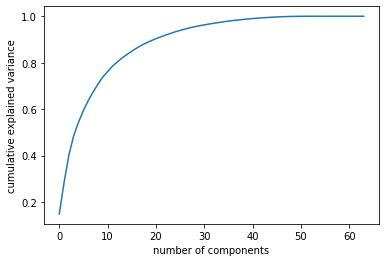

In [37]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');